# Classification Study

In [1]:
%matplotlib notebook
import pandas as pd
import alika
from alika import plot_learning_curve
from alika import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

# smes = alika.load_smes_main_bank()
# smes = alika.load_smes_main_bank()
smes = load_digits()
if type(smes.data) != type(pd.DataFrame()):
    smes.data = pd.DataFrame(smes.data)

if type(smes.target) != type(pd.Series()):
    smes.target = pd.Series(smes.target)
    smes.target.name = "Y"

## Right Side Variable Summary Statistics

In [2]:
smes.data.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


## Left Side Variable Summary Statistics

In [3]:
smes.target.describe()

count    1797.000000
mean        4.490818
std         2.865304
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         9.000000
Name: Y, dtype: float64

## Summary Statistics by Main Bank Class

### Right-side Variable Statistics

In [4]:
target_name = smes.target.name
smes_frame = smes.data.copy()
smes_frame[target_name] = smes.target
smes_groups = smes_frame.groupby(by=target_name)

pd.concat([smes_groups[target_name].count(),smes_groups.mean()],axis=1)

,Y,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
Y,,,,,,,,,,,,,,,,,,,,,
0,178,0.0,0.022472,4.185393,13.095506,11.297753,2.926966,0.033708,0.000000,0.000000,...,2.415730,0.000000,0.00000,0.005618,4.157303,13.561798,13.325843,5.438202,0.275281,0.000000
1,182,0.0,0.010989,2.456044,9.208791,10.406593,6.076923,0.994505,0.000000,0.000000,...,2.049451,0.642857,0.00000,0.005495,2.241758,9.137363,13.027473,8.576923,3.049451,1.494505
2,177,0.0,0.932203,9.666667,14.186441,9.627119,2.384181,0.107345,0.000000,0.011299,...,7.180791,0.711864,0.00565,0.943503,10.096045,13.966102,13.118644,11.796610,8.022599,1.932203
3,183,0.0,0.644809,8.387978,14.169399,14.224044,7.480874,0.786885,0.005464,0.010929,...,5.928962,0.065574,0.00000,0.502732,9.316940,14.650273,13.972678,8.672131,1.409836,0.065574
4,181,0.0,0.000000,0.453039,7.055249,11.497238,2.011050,0.209945,0.127072,0.000000,...,0.022099,0.000000,0.00000,0.022099,0.552486,7.812155,11.812155,1.955801,0.000000,0.000000
5,182,0.0,0.967033,9.983516,13.038462,13.895604,12.181319,4.142857,0.043956,0.005495,...,1.335165,0.000000,0.00000,0.956044,10.664835,14.736264,9.362637,2.532967,0.197802,0.000000
6,181,0.0,0.000000,1.138122,11.165746,9.585635,1.447514,0.011050,0.000000,0.000000,...,10.779006,0.524862,0.00000,0.000000,1.436464,10.685083,15.093923,13.044199,4.480663,0.093923
7,179,0.0,0.167598,5.100559,13.061453,14.245810,11.027933,5.189944,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.122905,6.391061,11.659218,2.206704,0.011173,0.000000,0.000000
8,174,0.0,0.143678,5.022989,11.603448,12.402299,6.235632,0.528736,0.000000,0.028736,...,2.316092,0.005747,0.00000,0.143678,5.005747,12.695402,13.011494,6.735632,1.206897,0.011494


### Right-side Variable Statistics (Standardized)

In [5]:
X = smes.data
target_name = smes.target.name
X = pd.DataFrame( StandardScaler().fit_transform(X),index=X.index,columns=X.columns)
smes_frame = X.copy()
smes_frame[target_name] = smes.target
smes_groups = smes_frame.groupby(by=target_name)

pd.concat([smes_groups[target_name].count(),smes_groups.mean()],axis=1)

,Y,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
Y,,,,,,,,,,,,,,,,,,,,,
0,178,0.0,-0.310239,-0.214451,0.296556,-0.128395,-0.503967,-0.399586,-0.125023,-0.059078,...,-0.266238,-0.209785,-0.023596,-0.293067,-0.274481,0.336748,0.307490,-0.224759,-0.438354,-0.196008
1,182,0.0,-0.322900,-0.578256,-0.618469,-0.336309,0.052087,-0.110611,-0.125023,-0.059078,...,-0.340715,0.443441,-0.023596,-0.293199,-0.649960,-0.674903,0.247000,0.307320,0.240025,0.607661
2,177,0.0,0.692840,0.938651,0.553388,-0.518166,-0.599783,-0.377438,-0.125023,0.060880,...,0.702657,0.513561,0.215968,0.711048,0.889613,0.429193,0.265484,0.853123,1.456129,0.843033
3,183,0.0,0.375956,0.669652,0.549376,0.554329,0.299923,-0.173056,-0.119754,0.056947,...,0.448119,-0.143154,-0.023596,0.239152,0.736895,0.585629,0.438625,0.323459,-0.160917,-0.160745
4,181,0.0,-0.335016,-0.999631,-1.125464,-0.081854,-0.665651,-0.346580,-0.002496,-0.059078,...,-0.752942,-0.209785,-0.023596,-0.275421,-0.981086,-0.977914,0.000614,-0.815098,-0.505670,-0.196008
5,182,0.0,0.731243,1.005307,0.283126,0.477702,1.129680,0.836304,-0.082639,-0.000747,...,-0.485953,-0.209785,-0.023596,0.724475,1.001106,0.605291,-0.495986,-0.717257,-0.457300,-0.196008
6,181,0.0,-0.335016,-0.855509,-0.157756,-0.527845,-0.765131,-0.406401,-0.125023,-0.059078,...,1.434293,0.323542,-0.023596,-0.299081,-0.807812,-0.321016,0.665940,1.064616,0.590005,-0.145501
7,179,0.0,-0.150222,-0.021926,0.288539,0.559408,0.926076,1.151232,0.839210,-0.059078,...,-0.757436,-0.209785,-0.023596,-0.167497,0.163373,-0.098279,-1.946736,-1.144753,-0.505670,-0.196008
8,174,0.0,-0.176596,-0.038245,-0.054710,0.129303,0.080103,-0.250698,-0.125023,0.245987,...,-0.286498,-0.203945,-0.023596,-0.145257,-0.108172,0.138646,0.243761,-0.004818,-0.210542,-0.189826


## Plot Learning Curves

In [6]:
# Show barchart of relative amounts of enterprises in various banks
X, y = StandardScaler().fit_transform(smes.data), smes.target
# X, y = smes.data, smes.target
#digits = load_digits()
#X, y = digits.data, digits.target

### Dummy Classifier

<IPython.core.display.Javascript object>


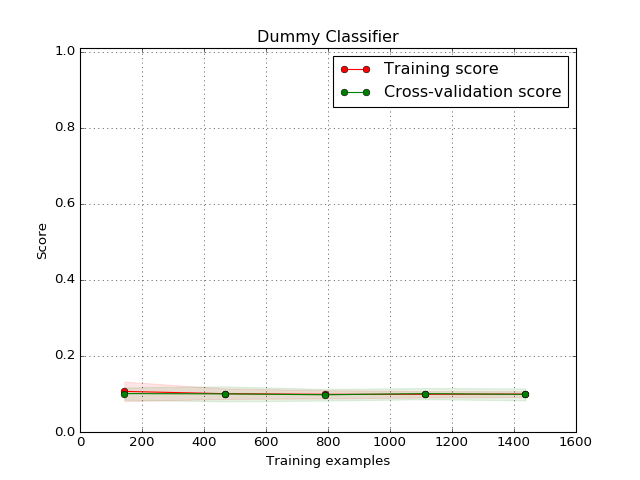

<module 'matplotlib.pyplot' from '/Users/amowers/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [7]:
title = "Dummy Classifier"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)
estimator = DummyClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.0, 1.01), cv=cv)


#### Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix
model = DummyClassifier()
model.fit(X,y)
y_true = y
y_pred = model.predict(X)
cm = confusion_matrix(y_true,y_pred)
cm

array([[16, 15, 18, 18, 19, 19, 21, 20, 20, 12],
       [20, 18, 22, 16, 18, 13, 24, 25, 12, 14],
       [13, 23, 19, 19, 20, 23, 12, 14, 13, 21],
       [22, 23, 20, 16, 13, 14, 18, 21, 18, 18],
       [23, 16, 19, 21, 18, 20, 16, 14, 16, 18],
       [16, 20, 17, 25, 27, 22, 23, 10, 12, 10],
       [16, 24, 21, 16, 16, 15, 12, 23, 21, 17],
       [21, 20, 16, 20, 14, 17, 19, 17, 10, 25],
       [17, 21, 20,  9, 15, 18, 25, 24, 15, 10],
       [14, 24, 21, 13, 12, 20, 16, 26, 13, 21]])

<IPython.core.display.Javascript object>


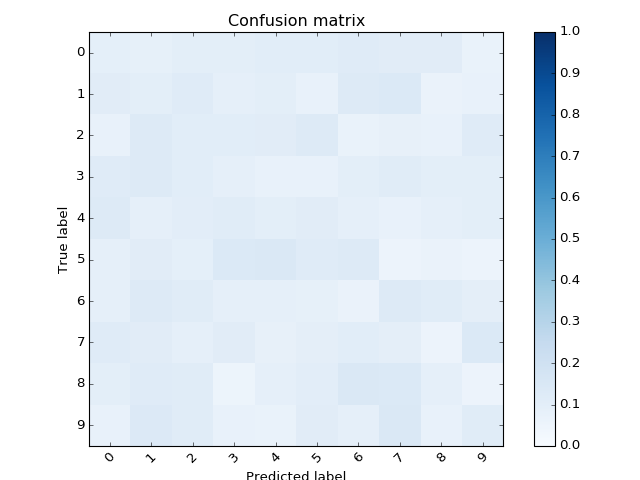

<module 'matplotlib.pyplot' from '/Users/amowers/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [9]:
target_names = y.unique()
target_names.sort()
plot_confusion_matrix(cm,target_names)

### Logistic Classifier

<IPython.core.display.Javascript object>


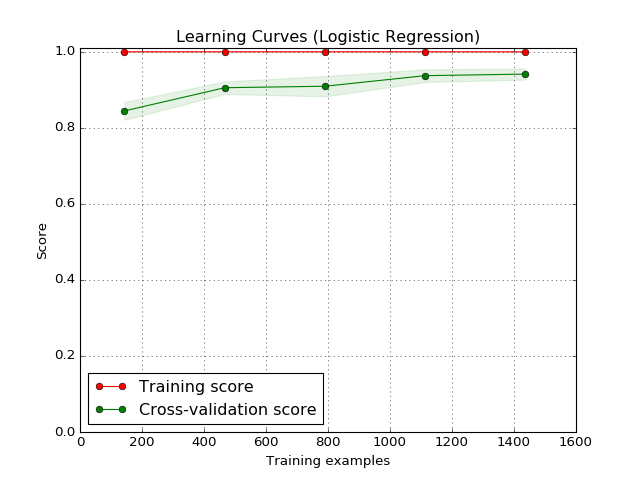

<module 'matplotlib.pyplot' from '/Users/amowers/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [10]:
title = "Learning Curves (Logistic Regression)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
estimator = LogisticRegression(C=1e6)
# from sklearn.svm import SVC
# estimator = SVC()
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

#### Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
from alika import plot_confusion_matrix
model = LogisticRegression(C=1e6)
model.fit(X,y)
y_true = y
y_pred = model.predict(X)
cm = confusion_matrix(y_true,y_pred)
cm

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 182,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 173,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1, 179]])

<IPython.core.display.Javascript object>


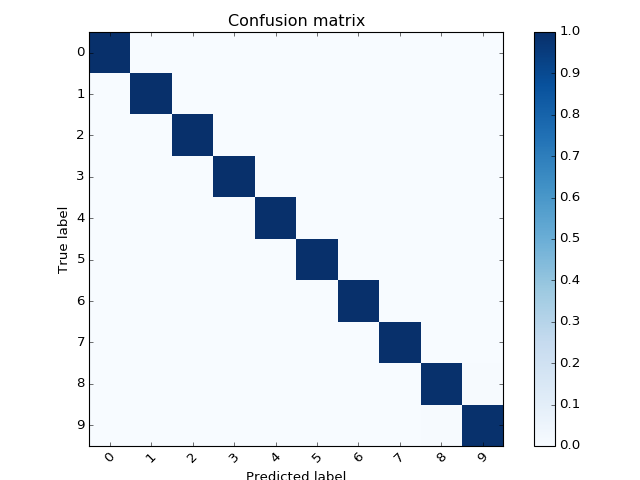

<module 'matplotlib.pyplot' from '/Users/amowers/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [12]:
target_names = y.unique()
target_names.sort()
plot_confusion_matrix(cm,target_names)